Importing the relevant liblaries 

In [121]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
%matplotlib inline

#DATA UNDERSTANDING AND PREPARATION

In [122]:
#loading our data using pandas
house_data = pd.read_csv('data/kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Column description

In [123]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Below,we get to understand more of how our columns look like as provided in the dataset column_names.md

##KING COUNTY DATASET COLUMN DESCRIPTION

1.*id*: Unique identifier for a house.

2.*date*: Date house was sold.

3.*price*: Sale price (prediction target).

4.*bedrooms*: Number of bedrooms.

5.*bathrooms*: Number of bathrooms.

6.*sqft_living*: Square footage of living space in the home.

7.*sqft_lot*: Square footage of the lot.

8.*floors*: Number of floors (levels) in house.

9.*waterfront*: Whether the house is on a waterfront.

10.*view*: Quality of view from house.

11.*condition*: How good the overall condition of the house is. Related to maintenance of house

12.*grade*: Overall grade of the house. Related to the construction and design of the house.

13.*sqft_above*: Square footage of house apart from basement.

14.*sqft_basement*: Square footage of the basement.

15.*yr_built*: Year when house was built.

16.*yr_renovated*: Year when house was renovated.

17.*zipcode*: ZIP Code used by the United States Postal Service.

18.*lat*: Latitude coordinate.

19.*long*: Longitude coordinate.

20.*sqft_living15*: The square footage of interior housing living space for the nearest 15 neighbors.

21.*sqft_lot15*: The square footage of the land lots of the nearest 15 neighbors.

In [124]:
#checking King county data shape
house_data.shape

(21597, 21)

This Dataframe contains 21,597 rows and 21 columns

DATA CLEANING

In this section,we are to clean our data to make it as consistent as possible by using python's liblaries frameworks
This includes checking and aligning the datatypes of our column,identifying and dropping duplicate values,identifying and solving of null or missing values by prioritisation

In [125]:
# checking the info on house_data DataFrame
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In regards to the description of the our data frame above,we rectify some the data type of some variables/columns to create consistency in our data

1.**id** : integer to object

2.**bathroom** :float to integer

3.**floors** :float to integer

4.**sqft_basement** :object to float

5.**yr_built** :integer to object

6.**yr_renovated** :float to object

7.**zipcode** :integer to object

8.**lat** integer to object

9.**long**iteger to object

10.**date** : object to datetime


In [126]:

#Convert integers to objects
house_data = house_data.astype({
    #'id': object,
    #'yr_built': object,
    #'yr_renovated': object,
    'zipcode': float,
    'lat': float,
    'long': float
    })
#house_data.info()

#cConvert floats to integers
floats_to_integers = ['bathrooms', 'floors']
house_data[floats_to_integers] = house_data[floats_to_integers].astype(float)
#house_data.info()



Since some of the sqft_basement values are numeric,we will replace them with 0 then convert them to floats

In [127]:
# Replace '?'(gotten from an error indicating availablity of strings in the entries) with 0 and then convert column to float
house_data['sqft_basement'] = house_data['sqft_basement'].replace('?', '0')
house_data['sqft_basement'] = house_data['sqft_basement'].astype(float)


In [128]:
#convert date to object
house_data['date'] = pd.to_datetime(house_data['date'])
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

Check for any missing values bellow

In [129]:
#Checking for missing values
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Observation;

Some columns have missing values ;

**Waterfront** -2,376 rows (11.002%)

**view** - 63 rows (0.3%)

**yr_renovated** -3,842(17.8%)

Get the entries of the three columns with missing data,types and their counts to observe and conclude on how to manipulate them

In [130]:
waterfront_data = house_data['waterfront'].value_counts()
waterfront_data

NO     19075
YES      146
Name: waterfront, dtype: int64

In [131]:
view_data= house_data['view'].value_counts()
view_data

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [132]:
yr_renovated_data = house_data['yr_renovated'].value_counts()
yr_renovated_data

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

How we get to deal with missing values

**Waterfront** -Replace the 2,376 NaN values with 'UNKNOWN'

**View** -Replace the 63 NaN missing values with 'NOT_RATED'

**yr_renovated**- Replace the 3,842 missing values with 0,this could be used to manifest or indicate that there where no renovations done

In [133]:
house_data['waterfront'] = house_data['waterfront'].fillna('UNKNOWN')
house_data['view'] = house_data['view'].fillna('NOT_RATED')
house_data['yr_renovated'] = house_data['yr_renovated'].fillna(0)


In [134]:
#Confirm missing values
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [135]:
cadinality = house_data.select_dtypes(include='object').nunique()
cadinality

waterfront     3
view           6
condition      5
grade         11
dtype: int64

Let us check for any duplicates in our data

In [136]:
house_data.duplicated().sum()

0

In [137]:
house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,...,7 Average,1180,0.0,1955,0.0,98178.0,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028.0,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074.0,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053.0,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,0.0,1995,0.0,98003.0,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NO,NOT_RATED,...,7 Average,1060,0.0,1963,0.0,98198.0,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146.0,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038.0,47.3684,-122.031,2390,7570


In [138]:


# Example DataFrame with 'lat' and 'long' columns
house_data = pd.DataFrame({
    'latitudes': ['lat'],
    'longitudes': ['long']
})

# Initialize geolocator
geolocator = Nominatim(user_agent="my_geocoder")

# Function to perform reverse geocoding
def reverse_geocode(row):
    location = geolocator.reverse((row['latitudes'], row['longitudes']))
    if location:
        return location.address
    else:
        return None

# Apply reverse geocoding to create new 'Location' column
house_data['Location'] = house_data.apply(reverse_geocode, axis=1)

# Display the updated DataFrame
print(house_data)

    


ValueError: Must be a coordinate pair or Point

EXPLORATORY DATA ANALYSIS

In [ ]:
#Summary Statistics: Compute basic statistics to understand the distribution and variability of each numerical feature.
print("\nSummary statistics:")
print(house_data.describe())


Summary statistics:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      1.750660   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.734042    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.000000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.000000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.000000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.000000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above  sqft_basement  yr_renovated  sqft_living15  \
count  21597.000000  21597.000000   21597.000000  21597.000000   21597.000000   
mean       1.445988   1788.596842     285.716581     68.758207    1986.620318   
std        0.551658    8

Correlation Matrix

In [ ]:
corr_matrix = house_data.corr()
corr_matrix


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.510631,0.701917,0.089876,0.237264,0.605368,0.321108,0.117855,0.585241,0.082845
bedrooms,0.308787,1.000000,0.465995,0.578212,0.032471,0.158065,0.479386,0.297229,0.017900,0.393406,0.030690
bathrooms,0.510631,0.465995,1.000000,0.698591,0.086029,0.486404,0.640895,0.245693,0.057311,0.510950,0.082039
sqft_living,0.701917,0.578212,0.698591,1.000000,0.173453,0.353372,0.876448,0.428660,0.051060,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.086029,0.173453,1.000000,-0.008603,0.184139,0.015031,0.004979,0.144763,0.718204
floors,0.237264,0.158065,0.486404,0.353372,-0.008603,1.000000,0.518037,-0.231754,-0.009505,0.296797,-0.012766
sqft_above,0.605368,0.479386,0.640895,0.876448,0.184139,0.518037,1.000000,-0.051175,0.020645,0.731767,0.195077
sqft_basement,0.321108,0.297229,0.245693,0.428660,0.015031,-0.231754,-0.051175,1.000000,0.065008,0.199288,0.015885
yr_renovated,0.117855,0.017900,0.057311,0.051060,0.004979,-0.009505,0.020645,0.065008,1.000000,0.000683,0.004286
sqft_living15,0.585241,0.393406,0.510950,0.756402,0.144763,0.296797,0.731767,0.199288,0.000683,1.000000,0.183515


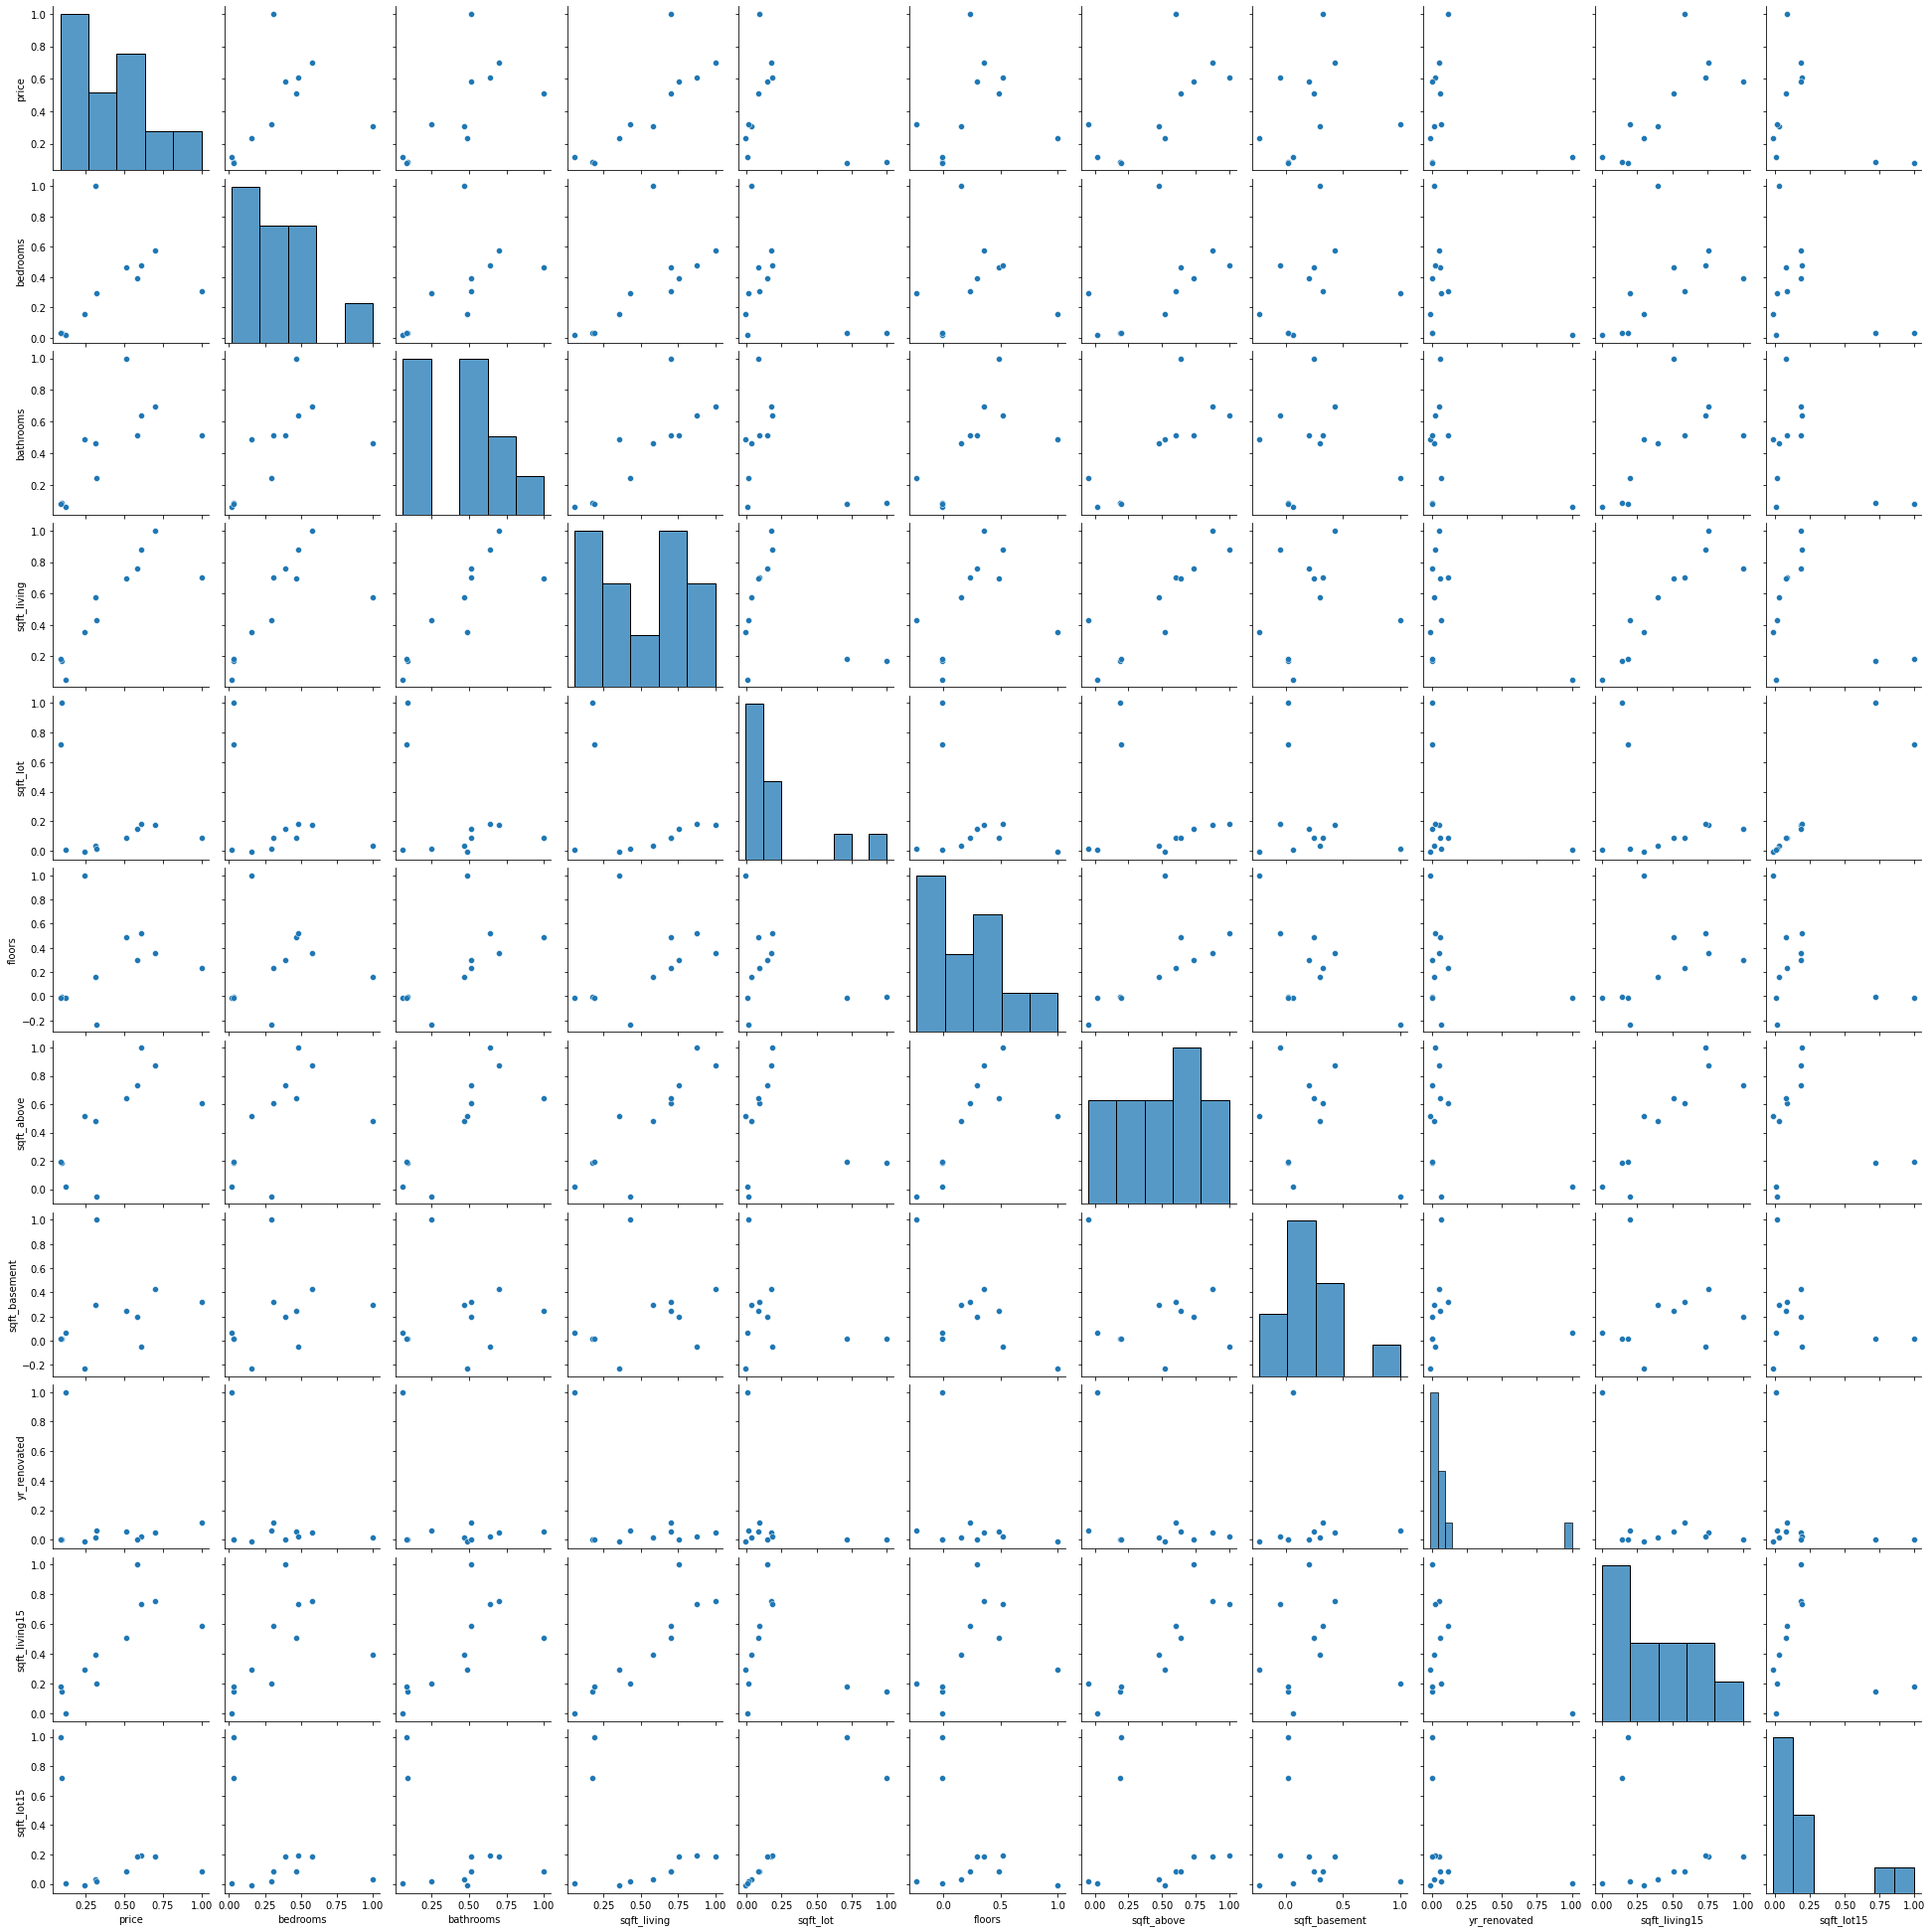

In [ ]:
# Create the pair plot
sns.pairplot(corr_matrix)
plt.show()


In [ ]:
# Access correlations between 'price' and other variables from the correlation matrix
price_correlations = corr_matrix['price']  # Drop 'price' itself to avoid correlation with itself

print("Correlations with Price:")
print(price_correlations)


Correlations with Price:
price            1.000000
bedrooms         0.308787
bathrooms        0.510631
sqft_living      0.701917
sqft_lot         0.089876
floors           0.237264
sqft_above       0.605368
sqft_basement    0.321108
yr_renovated     0.117855
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64


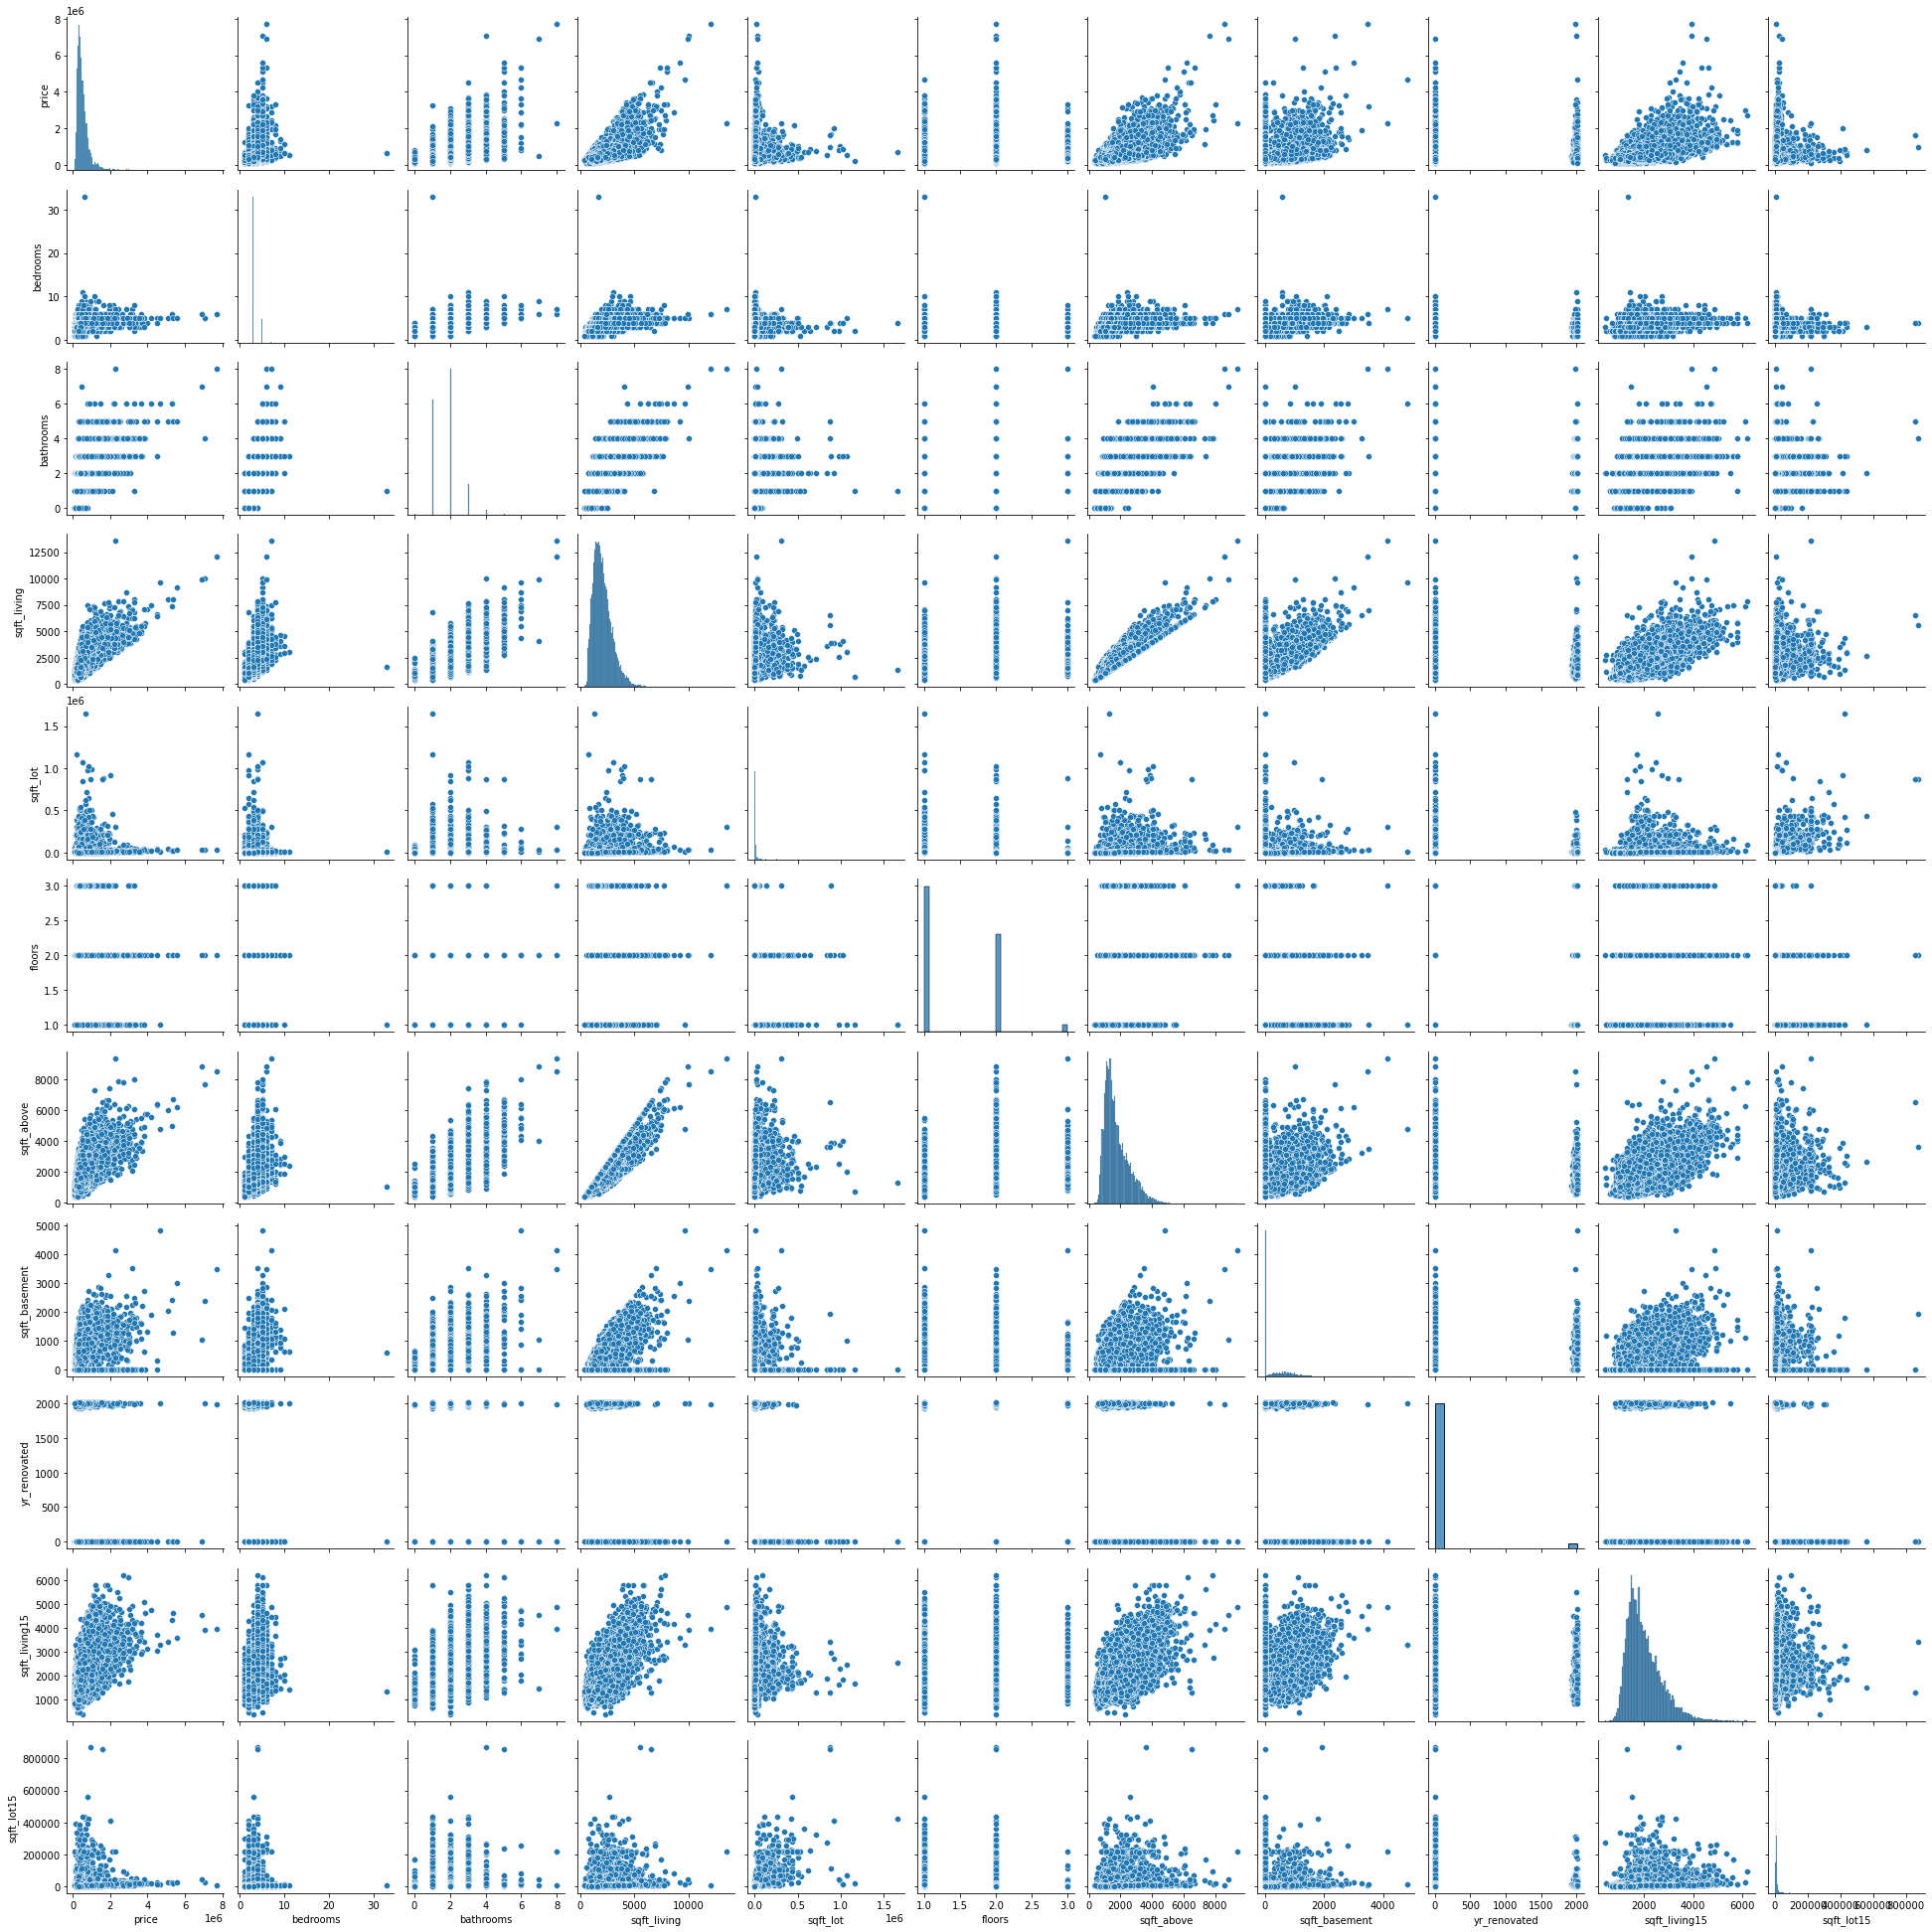

In [ ]:
# Extract the columns based on their correlation with price
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                   'floors', 'sqft_above', 'sqft_basement', 'yr_renovated',
                   'sqft_living15', 'sqft_lot15']

# Create the pair plot
sns.pairplot(house_data[columns_to_plot])
plt.show()


PAIR PLOT

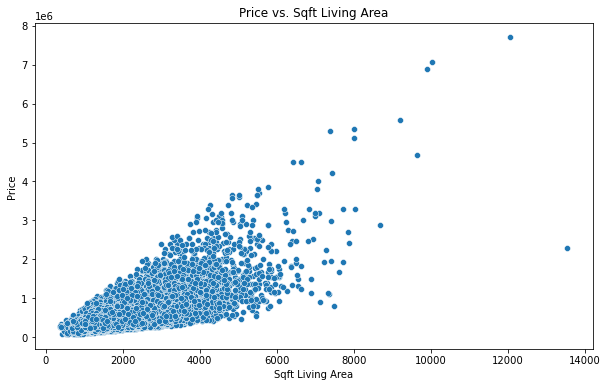

In [ ]:
# Scatter plot of price vs. sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=house_data)
plt.title('Price vs. Sqft Living Area')
plt.xlabel('Sqft Living Area')
plt.ylabel('Price')
plt.show()

In [ ]:
house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
# Renovation age
house_data['renovation_age'] = 2024 - house_data['yr_renovated'])
data
# Renovation age
house_data['renovation_age'] = np.where(house_data['yr_renovated'] == 0, 0, 2024 - data['yr_renovated'])
house_data

SyntaxError: unmatched ')' (<ipython-input-25-7a0d1c723fc3>, line 2)

In [ ]:
# Grouping by 'bedrooms' and calculating mean price and sqft_living for each group
grouped_data = house_data.groupby(['bedrooms']).agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'id': 'count'  # Example of counting number of records in each group
}).reset_index()
grouped_data
grouped_data.sort_values(by='price')

,bedrooms,price,sqft_living,id
0,1,3.182395e+05,888.153061,196
1,2,4.013877e+05,1239.752899,2760
2,3,4.662766e+05,1805.837235,9824
10,11,5.200000e+05,3000.000000,1
3,4,6.355647e+05,2554.649666,6882
11,33,6.400000e+05,1620.000000,1
4,5,7.868741e+05,3047.545284,1601
9,10,8.200000e+05,3706.666667,3
5,6,8.258535e+05,3284.341912,272
8,9,8.939998e+05,3775.000000,6


In [ ]:
grouped_data.corr()

,yr_renovated,price,sqft_living,id
yr_renovated,1.000000,0.107890,0.055139,-0.995657
price,0.107890,1.000000,0.752311,-0.053176
sqft_living,0.055139,0.752311,1.000000,0.000056
id,-0.995657,-0.053176,0.000056,1.000000
